### L-S method AstroPy realization

In [381]:
import matplotlib.pyplot as plt
from matplotlib import cm
from astropy.timeseries import LombScargle
import scipy.signal as signal
import numpy as np
%matplotlib inline

In [382]:

# load foF2

data=np.loadtxt('AVD1976dayli_KLD.dat')
time=data[:,0]
foF2=data[:,1]
ntime=len(time)


In [383]:
# test fo LS
# initial data
"""
time_=np.arange(120)
ntime=len(time)
#period
T=12.
foF2=4.*np.sin(2.*np.pi/T*time)
#foF2=4.*np.sin(w*time)
"""




'\ntime_=np.arange(120)\nntime=len(time)\n#period\nT=12.\nfoF2=4.*np.sin(2.*np.pi/T*time)\n#foF2=4.*np.sin(w*time)\n'

0.0008333333333333333 0.5041666666666667 303


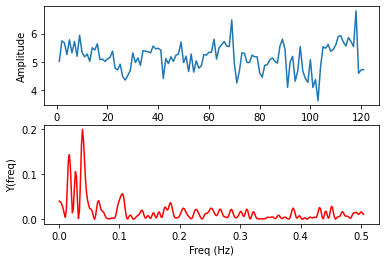

In [384]:
fof2mean=np.mean(foF2)
nyquist=1
freq, Y = LombScargle(time,foF2-fof2mean).autopower(nyquist_factor=nyquist)
min_freq=1./time[ntime-1]
max_freq=1.
#freq, Y = LombScargle(time,foF2-fof2mean).autopower(minimum_frequency=min_freq,maximum_frequency=max_freq)
fig, ax = plt.subplots(2, 1)
ax[0].plot(time,foF2)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')

ax[1].plot(freq,Y,'r') # plotting the spectrum

ax[1].set_xlabel('Freq (Hz)')
ax[1].set_ylabel('Y(freq)')
print(freq.min(),freq.max(),len(freq))

(0.0, 120.0)

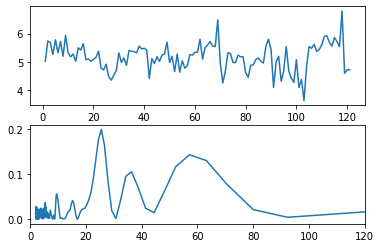

In [385]:
#Now make a plot of the input data:

plt.subplot(2, 1, 1)
plt.plot(time, foF2)

#Then plot the normalized periodogram:

plt.subplot(2, 1, 2)
plt.plot(1./freq,Y)
#plt.savefig("fig1.png")
plt.xlim([0,120])

(5.0, 120.0)

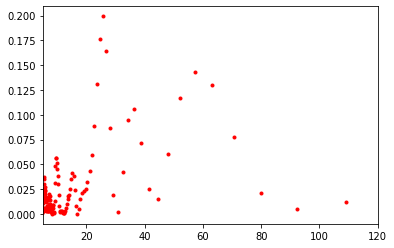

In [386]:
per=np.zeros(int(ntime/2))
per=1./freq
plt.plot(per,Y,'r.')
plt.xlim([5,120])

## WINDOW LS transform

In [387]:
print(per)

[1200.          400.          240.          171.42857143  133.33333333
  109.09090909   92.30769231   80.           70.58823529   63.15789474
   57.14285714   52.17391304   48.           44.44444444   41.37931034
   38.70967742   36.36363636   34.28571429   32.43243243   30.76923077
   29.26829268   27.90697674   26.66666667   25.53191489   24.48979592
   23.52941176   22.64150943   21.81818182   21.05263158   20.33898305
   19.67213115   19.04761905   18.46153846   17.91044776   17.39130435
   16.90140845   16.43835616   16.           15.58441558   15.18987342
   14.81481481   14.45783133   14.11764706   13.79310345   13.48314607
   13.18681319   12.90322581   12.63157895   12.37113402   12.12121212
   11.88118812   11.65048544   11.42857143   11.21495327   11.00917431
   10.81081081   10.61946903   10.43478261   10.25641026   10.08403361
    9.91735537    9.75609756    9.6           9.4488189     9.30232558
    9.16030534    9.02255639    8.88888889    8.75912409    8.63309353
    8.

In [388]:
# window size in day
w_size=36
dx=1.
# number of points in windows
w_num=int(w_size/dx)
# number of  
w_frec=len(time)-1

In [389]:
# возможны пропуски в данных
bord=[]
i_st_end=np.zeros(2).astype(int)
jstart=0
jend=0
# search windows
for i in range(0,ntime-w_num-1): # цикл по всем точкам xt
   
    ix_start=i
    ix_end=i+w_num
    x_s=time[ix_start]
    x_e=time[ix_end]
    #print(i,x_s,x_e)
    #print(i_st_end)
    while(x_s > time[jstart]):
        jstart=jstart+1
        jend=jstart
        #print(jstart)
    while (x_e > time[jend]):
        jend=jend+1
        if(jend>w_frec):
            jend=w_frec
            break
         
        
    bord.append([jstart,jend])
    

In [390]:
w_spectr=len(bord)
freq, Y = LombScargle(time[0:w_size],foF2[0:w_size]).autopower(nyquist_factor=1)

i_df=len(freq)
print(i_df,len(freq),len(bord))
m_LS=np.zeros(i_df*w_spectr).reshape(i_df,w_spectr)
print(1./freq)

90 90 84
[350.         116.66666667  70.          50.          38.88888889
  31.81818182  26.92307692  23.33333333  20.58823529  18.42105263
  16.66666667  15.2173913   14.          12.96296296  12.06896552
  11.29032258  10.60606061  10.           9.45945946   8.97435897
   8.53658537   8.13953488   7.77777778   7.44680851   7.14285714
   6.8627451    6.60377358   6.36363636   6.14035088   5.93220339
   5.73770492   5.55555556   5.38461538   5.2238806    5.07246377
   4.92957746   4.79452055   4.66666667   4.54545455   4.43037975
   4.32098765   4.21686747   4.11764706   4.02298851   3.93258427
   3.84615385   3.76344086   3.68421053   3.60824742   3.53535354
   3.46534653   3.39805825   3.33333333   3.27102804   3.21100917
   3.15315315   3.09734513   3.04347826   2.99145299   2.94117647
   2.89256198   2.84552846   2.8          2.75590551   2.71317829
   2.67175573   2.63157895   2.59259259   2.55474453   2.51798561
   2.4822695    2.44755245   2.4137931    2.38095238   2.34899329
 

In [391]:
# massive of spectrogramm
# window LS transform

i=0
for gran in bord:
    i_st=gran[0]
    i_en=gran[1]
    foF2mean=np.mean(foF2[i_st:i_en])
    #m_LS[0:i_df,i]=signal.lombscargle(time[i_st:i_en], foF2[i_st:i_en]-foF2mean, freq)#,normalize=True)
    freq, m_LS[0:i_df,i] = LombScargle(time[i_st:i_en],foF2[i_st:i_en]).autopower(nyquist_factor=1)
    i=i+1
    
print (np.shape(m_LS),np.shape(freq))         
        

(90, 84) (90,)


84 84 90 90


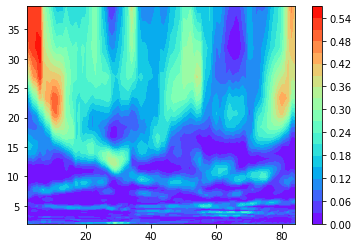

In [392]:
print(len(time[:-w_num-1]),len(m_LS[0,:]),len(m_LS[:,0]),len(freq))
#lev=np.arange(8,16,2)
per=1./freq
plt.contourf(time[1:-w_num-1],per[4:],m_LS[4:,1:],levels=20,cmap=cm.rainbow)

plt.colorbar()
plt.savefig("LS_astroPy"+str(w_size).format("6.2f")+".png")

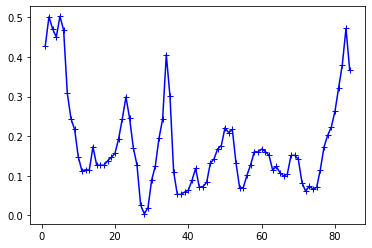

In [393]:
plt.plot(time[:-w_num-1],m_LS[3,:],'b+-')

In [394]:
print(1./freq)

[350.         116.66666667  70.          50.          38.88888889
  31.81818182  26.92307692  23.33333333  20.58823529  18.42105263
  16.66666667  15.2173913   14.          12.96296296  12.06896552
  11.29032258  10.60606061  10.           9.45945946   8.97435897
   8.53658537   8.13953488   7.77777778   7.44680851   7.14285714
   6.8627451    6.60377358   6.36363636   6.14035088   5.93220339
   5.73770492   5.55555556   5.38461538   5.2238806    5.07246377
   4.92957746   4.79452055   4.66666667   4.54545455   4.43037975
   4.32098765   4.21686747   4.11764706   4.02298851   3.93258427
   3.84615385   3.76344086   3.68421053   3.60824742   3.53535354
   3.46534653   3.39805825   3.33333333   3.27102804   3.21100917
   3.15315315   3.09734513   3.04347826   2.99145299   2.94117647
   2.89256198   2.84552846   2.8          2.75590551   2.71317829
   2.67175573   2.63157895   2.59259259   2.55474453   2.51798561
   2.4822695    2.44755245   2.4137931    2.38095238   2.34899329
   2.31788